In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_csv("../data/skillshare_2022_reviews.csv", index_col=0)
reviews

,review_id,class_id,uid,rating,level_id,level,create_time,update_time
0,1487282,543730,16283655,3,1,beginner,2022-01-01 07:51:50,2022-01-01 07:51:50
1,1487306,133431,23704222,3,1,beginner,2022-01-01 11:35:32,2022-01-01 11:35:32
2,1487380,544043,9627211,1,4,all levels,2022-01-01 16:43:50,2022-01-01 16:43:50
3,1487390,402516,21070834,4,1,beginner,2022-01-01 17:18:37,2022-01-01 17:18:37
4,1487542,156788,23718544,4,1,beginner,2022-01-02 00:47:13,2022-01-02 00:47:13
...,...,...,...,...,...,...,...,...
32293,1552212,559085,26184178,4,1,beginner,2022-06-25 12:20:19,2022-06-25 12:20:19
32294,1552256,581366,26242404,4,4,all levels,2022-06-25 15:48:00,2022-06-25 15:48:00
32295,1552290,553303,15895138,4,4,all levels,2022-06-25 16:56:14,2022-06-25 16:56:14
32296,1552318,576723,26259950,3,2,intermediate,2022-06-25 18:15:28,2022-06-25 18:15:28


In [3]:
reviews.isnull().sum()

review_id      0
class_id       0
uid            0
rating         0
level_id       0
level          0
create_time    0
update_time    0
dtype: int64

In [4]:
reviews.describe()

,review_id,class_id,uid,rating,level_id
count,3.229800e+04,32298.000000,3.229800e+04,32298.000000,32298.000000
mean,1.521548e+06,405869.924268,2.145621e+07,3.514738,2.236702
std,1.720490e+04,135649.137440,6.340671e+06,0.685879,1.324486
min,1.487224e+06,20555.000000,1.419000e+03,1.000000,1.000000
25%,1.507586e+06,292992.000000,2.052863e+07,3.000000,1.000000
50%,1.522206e+06,440579.000000,2.426866e+07,4.000000,2.000000
75%,1.536150e+06,525480.000000,2.522080e+07,4.000000,4.000000
max,1.552336e+06,581849.000000,2.638518e+07,4.000000,4.000000


In [5]:
starts_with_views_df = pd.read_csv('../data/skillshare_2022_starts_views_combined.csv', index_col=0)
starts_with_views_df = starts_with_views_df[starts_with_views_df.user_uid.notnull()]
starts_with_views_df.user_uid = starts_with_views_df.user_uid.astype(int)
starts_with_views_df.set_index("user_uid", inplace=True)

day_columns = [ f"day-{i}" for i in range(1, 32) ]
starts_with_views_df["total_watch_time"] = starts_with_views_df[day_columns].sum(axis=1)
starts_with_views_df.head()

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
reviews.uid.value_counts()

25562894    293
24655972    154
23390131    130
23841710    129
23741581     92
           ... 
25416146      1
25370709      1
24846190      1
25502492      1
26259950      1
Name: uid, Length: 19042, dtype: int64

In [7]:
starts_with_views_df['review_posts'] = reviews.uid.value_counts()
starts_with_views_df['review_posts'].fillna(0.0)
starts_with_views_df

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time,review_posts
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,NaN
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,NaN
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0,NaN
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284161,2022-05-31 23:56:47,0,False,2,2,0,0,35,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,NaN
26259150,2022-05-31 23:56:53,0,False,2,2,0,17,227,0.0,1508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1508.0,NaN
26284159,2022-05-31 23:57:46,0,True,1,5,0,17,227,0.0,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,NaN


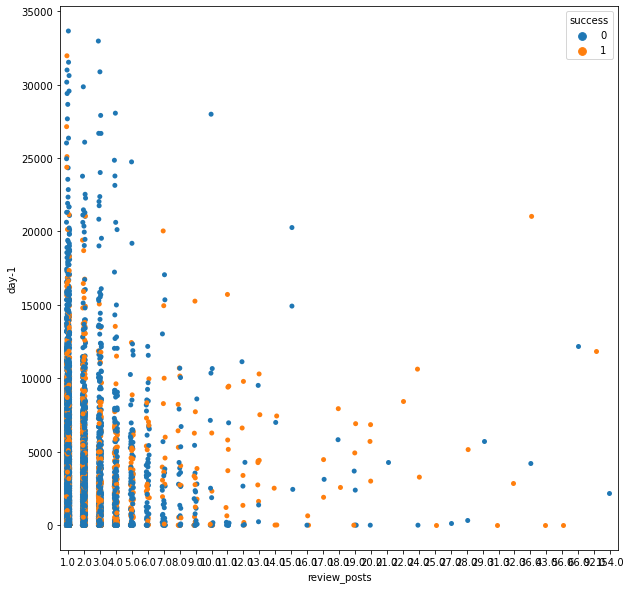

In [8]:
plt.figure(figsize=(10,10))
sns.stripplot(
    data=starts_with_views_df,
    x="review_posts",
    y="day-1",
    hue="success"
)
plt.show()